# Implementação

In [2]:
def ODEsys(t,y,params):
    a,c,s = params
    A = y
    return[(1 - A)*c*s*(A)**a + A*c*(1-s)*(1-A)**a]

In [9]:
T=ode_solver()
T.algorithm="rk8pd"
T.function=ODEsys

In [2]:
!pip install pymc3

Defaulting to user installation because normal site-packages is not writeable


In [4]:
%matplotlib inline
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import arviz as az
import theano

plt.style.use('seaborn-darkgrid')

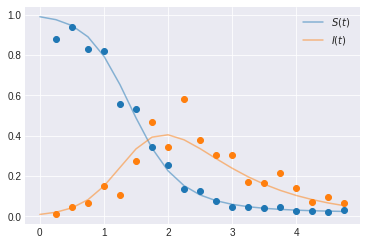

In [5]:
def SIR(y, t, c, s, a):
    dt = (1 - y)*c*s(y)*a + y*c(1-s)*(1-y)*a
    return [dt]

times = np.arange(0, 5, 0.25)

beta,gamma = 4,1.0
# Gerando curvas simuladas
y = odeint(SIR, t=times, y0=[0.99, 0.01], args=((beta, gamma),), rtol=1e-8)
# Simulando dados  Assumindo uma distribuição log-normal com média igual às séries simuladas
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.2, 0.3])

plt.plot(times[1::], yobs, marker='o', linestyle='none')
plt.plot(times, y[:, 0], color='C0', alpha=0.5, label=f'$S(t)$')
plt.plot(times, y[:, 1], color='C1', alpha=0.5, label=f'$I(t)$');
plt.legend();